# Unit 5 - NLP End Project - Customer Grievance Classification
## 2509 - Aravind Kothandaraman

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Streamlining the Customer Grievance Process

**Context:**
As a data scientist working for the front office of a major American multinational bank, you are responsible for enhancing customer service and ensuring compliance with financial regulations. Your current assignment involves analysing the customer complaints the bank has received over the past year.

**Problems:**
- The current time-consuming manual process for daily triaging and reviewing of customer complaints
- The complaints data is currently underutilized in enhancing the quality of products and services.

**Objective:**
The goal is to use NLP techniques, such as text classification and sentiment analysis, to efficiently gain insights into the underlying causes of customer grievances. By leveraging these methods, we aim to better understand and address customer grievances, ultimately improving our grievance redressal process.

## Step - 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np

## Step - 2: Load the Data

In [3]:
# Load the data from the Excel file
# it requires a few additional libraries to be installed in your environment
!pip install openpyxl

In [4]:
source_data = "/content/drive/MyDrive/AI_ML_course/02-CourseEndProject/Unit5-NLP/banking_complaints_2023.xlsx"
# "banking_complaints_2023.xlsx"

# read the Excel file using pandas `ExcelFile` class.
# this will give us a list of sheet names in the excel file
xl = pd.ExcelFile(source_data)
xl.sheet_names

['complaints_banking_2023',
 'Department of Product',
 'Issues',
 'Data Dictionary']

In [5]:
# Read ALL sheets -> returns a dict: {sheet_name: DataFrame}
dfs_by_sheet = pd.read_excel(source_data, sheet_name=None)
{sheet: df.shape for sheet, df in dfs_by_sheet.items()}

{'complaints_banking_2023': (7011, 9),
 'Department of Product': (17, 2),
 'Issues': (2676, 2),
 'Data Dictionary': (12, 3)}

In [6]:
dfs_by_sheet["complaints_banking_2023"].head()

,Complaint ID,Date Received,Banking Product,Department,Issue ID,Complaint Description,State,ZIP,Bank Response
0,CID76118977,2023-01-01,Checking or savings account,CASA,I_3510635,on XX/XX/XX22 I opened a safe balance account ...,California,92311,Closed with monetary relief
1,CID98703933,2023-01-01,"Credit reporting, credit repair services, or o...",Credit Reports,I_3798538,There is an item from Bank of ABC on my credit...,California,91344,Closed with explanation
2,CID52036665,2023-01-01,Checking or savings account,CASA,I_3648593,On XX/XX/XX22 I found out that my account was ...,New York,10466,Closed with monetary relief
3,CID62581335,2023-01-01,Credit card or prepaid card,Credit Cards,I_6999080,I've had a credit card for years with Bank of ...,California,92127,Closed with monetary relief
4,CID65731164,2023-01-01,Checking or savings account,CASA,I_3648593,This issue has to do with the way that Bank of...,New Jersey,7946,Closed with explanation


In [ ]:
# Read SELECTED sheets by name
# selected_sheets = dfs_by_sheet.keys()  # replace with e.g. ["Sheet1", "Sheet2"]
# dfs_selected = pd.read_excel(source_data, sheet_name=list(selected_sheets))
# {sheet: df.shape for sheet, df in dfs_selected.items()}

In [7]:
complaints_df = dfs_by_sheet["complaints_banking_2023"]
complaints_df.shape

(7011, 9)

In [8]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Complaint ID           7011 non-null   object        
 1   Date Received          7011 non-null   datetime64[ns]
 2   Banking Product        7011 non-null   object        
 3   Department             7011 non-null   object        
 4   Issue ID               7011 non-null   object        
 5   Complaint Description  7011 non-null   object        
 6   State                  6984 non-null   object        
 7   ZIP                    6981 non-null   object        
 8   Bank Response          7011 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 493.1+ KB


## Step - 3: Data Preprocessing

In [9]:
# check for missing values
complaints_df.isnull().sum()

,0
Complaint ID,0
Date Received,0
Banking Product,0
Department,0
Issue ID,0
Complaint Description,0
State,27
ZIP,30
Bank Response,0


### Check for data types and convert if necessary

In [10]:
# rename columns for easier access
complaints_df = complaints_df.rename(columns={
    "Complaint ID": "complaint_id",
    "Date Received": "date_received",
    "Banking Product": "product",
    "Department": "department",
    "Issue ID": "issue_id",
    "Complaint Description": "complaint_description",
    "State": "state",
    "ZIP": "zip",
    "Bank Response": "bank_response",
})

In [11]:
print(complaints_df.head())

complaints_df.info()

  complaint_id date_received  \
0  CID76118977    2023-01-01   
1  CID98703933    2023-01-01   
2  CID52036665    2023-01-01   
3  CID62581335    2023-01-01   
4  CID65731164    2023-01-01   

                                             product      department  \
0                        Checking or savings account            CASA   
1  Credit reporting, credit repair services, or o...  Credit Reports   
2                        Checking or savings account            CASA   
3                        Credit card or prepaid card    Credit Cards   
4                        Checking or savings account            CASA   

    issue_id                              complaint_description       state  \
0  I_3510635  on XX/XX/XX22 I opened a safe balance account ...  California   
1  I_3798538  There is an item from Bank of ABC on my credit...  California   
2  I_3648593  On XX/XX/XX22 I found out that my account was ...    New York   
3  I_6999080  I've had a credit card for years with Bank o

In [12]:
# change the data types for the key columns
complaints_df = complaints_df.astype({
    "complaint_id": "string",
    "product": "string",
    "issue_id": "string",
    "department": "string",
    "complaint_description": "string",
    "state": "string",
    "zip": "string",
    "bank_response": "string",
    "date_received": "datetime64[ns]",
})

In [13]:
complaints_df.dtypes

,0
complaint_id,string[python]
date_received,datetime64[ns]
product,string[python]
department,string[python]
issue_id,string[python]
complaint_description,string[python]
state,string[python]
zip,string[python]
bank_response,string[python]


In [14]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   complaint_id           7011 non-null   string        
 1   date_received          7011 non-null   datetime64[ns]
 2   product                7011 non-null   string        
 3   department             7011 non-null   string        
 4   issue_id               7011 non-null   string        
 5   complaint_description  7011 non-null   string        
 6   state                  6984 non-null   string        
 7   zip                    6981 non-null   string        
 8   bank_response          7011 non-null   string        
dtypes: datetime64[ns](1), string(8)
memory usage: 493.1 KB


### Identify date ranges

In [15]:
# identify the date range of complaints
min_date = complaints_df["date_received"].min()
max_date = complaints_df["date_received"].max()
print(f"Date range: {min_date} to {max_date}")

# duh... the file name already says 2023 :)
print("duh..! the file name already says 2023 :)")

Date range: 2023-01-01 00:00:00 to 2023-10-21 00:00:00
duh..! the file name already says 2023 :)


### Create a function for Preprocessing Text Data

In [16]:
# create a function for text preprocessing

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")

def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # remove numbers using regex is easier and ideal
    text = re.sub(r"\d+", "", text)
    # remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    # tokenize the text
    tokens = text.split()
    # remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    # applying lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # join tokens back to string
    preprocessed_text = " ".join(tokens)
    return preprocessed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
# quick test the function
sample_text = complaints_df["complaint_description"].iloc[0]
print(sample_text)
print("-"*50)
print(preprocess_text(sample_text))

on XX/XX/XX22 I opened a safe balance account online using my payroll check of over {$600.00} as my account opener. On XX/XX/XX22, I attempted to login to my app and received a " account locked contact customer service @ XXXX '' error message. I placed the call and was told I would have to go to a branch to verify my identity, which I did. At the same time, I was told I had a positive balance of of {$650.00} and could make a withdrawal from the teller, which I did for {$400.00} leaving a balance of + {$250.00}. Shortly after that, I deposited a mobile check for {$5XX.00}. On XX/XX/XX22, again I attempted to login and received the previous error message along with 3 emails stating a hold was placed on my account. Contacting the same previous number I was told that my acct was being closed by the Risk Dept. due to lack of identity verification, which I told them I had done the day before. I was then told it didn't matter the account was already being closed and it was not reversible, so 

The function `preprocess_text` performs the following steps:
1. Converts text to lowercase
2. Removes punctuation
3. Removes numbers using regex
4. Removes extra whitespace
5. Tokenizes the text into words
6. Removes stopwords
7. Applies lemmatization to reduce words to their base form
8. Joins the tokens back into a single string

And it does what it is supposed to do!

### Apply the function to the complaint descriptions

In [18]:
# apply the preprocessing function to the complaint descriptions and save the result in a new column
complaints_df["preprocessed_description"] = complaints_df["complaint_description"].apply(preprocess_text)

In [19]:
# lets see the results along with their original lengths
complaints_df[["complaint_description", "preprocessed_description"]].assign(
    complaint_description_len=complaints_df["complaint_description"].str.len(),
    preprocessed_description_len=complaints_df["preprocessed_description"].str.len(),
).head()

# len(complaints_df["complaint_description"]),
# len(complaints_df["preprocessed_description"])


,complaint_description,preprocessed_description,complaint_description_len,preprocessed_description_len
0,on XX/XX/XX22 I opened a safe balance account ...,xxxxxx opened safe balance account online usin...,1827,1035
1,There is an item from Bank of ABC on my credit...,item bank abc credit report belong must remove...,354,189
2,On XX/XX/XX22 I found out that my account was ...,xxxxxx found account frozen apparent reason we...,426,258
3,I've had a credit card for years with Bank of ...,ive credit card year bank abc xxxxxxxx paid ba...,2153,1280
4,This issue has to do with the way that Bank of...,issue way bank abc account linking bill pay pa...,1339,869


## Step - 4: Text Feature Engineering

To prepare the 'department' column as a target variable for classification models, we will encode into numerical labels using `LabelEncoder` from `sklearn.preprocessing`



In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply fit_transform to the 'department' column
complaints_df["department_encoded"] = label_encoder.fit_transform(complaints_df["department"])

# Print the mapping of original department names to their encoded numerical labels
print("Department Label Mapping:")
for i, department_name in enumerate(label_encoder.classes_):
    print(f"{department_name}: {i}")

# Display the first 5 rows of the 'department' and 'department_encoded' columns
print("\nPreview of encoded department column:")
print(complaints_df[["department", "department_encoded"]].head())

Department Label Mapping:
CASA: 0
Credit Cards: 1
Credit Reports: 2
Loans: 3
Mortgage: 4
Others: 5
Remittance: 6

Preview of encoded department column:
       department  department_encoded
0            CASA                   0
1  Credit Reports                   2
2            CASA                   0
3    Credit Cards                   1
4            CASA                   0


In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = complaints_df["preprocessed_description"]
y = complaints_df['department_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (5608,)
Shape of X_test: (1403,)
Shape of y_train: (5608,)
Shape of y_test: (1403,)


## Step - 5: Complaint Classification

Preparing the data for model training, using train-test-split of the TF-IDF features and encoded department label.



In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the preprocessed descriptions
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert the sparse matrix to a dense array
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

# Print the shape
print("Shape of TF-IDF features:", X_train_tfidf.shape)

Shape of TF-IDF features: (5608, 5000)


Using `Naive Bayes Model`

In [32]:
from sklearn.naive_bayes import MultinomialNB

# -------------------------------
# Naive Bayes Model
# -------------------------------
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_preds = nb.predict(X_test_tfidf)

print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds, zero_division=0))

Naive Bayes Performance:
Accuracy: 0.6742694226657163
              precision    recall  f1-score   support

           0       0.57      0.90      0.70       331
           1       0.60      0.72      0.66       322
           2       0.77      0.64      0.70       222
           3       0.84      0.64      0.73       222
           4       0.95      0.76      0.85       170
           5       0.00      0.00      0.00        51
           6       1.00      0.01      0.02        85

    accuracy                           0.67      1403
   macro avg       0.68      0.53      0.52      1403
weighted avg       0.70      0.67      0.64      1403



Using `LogisticRegression` model, train it using the prepared training data (`X_train`, `y_train`).



In [33]:
from sklearn.linear_model import LogisticRegression

# -------------------------------
# Logistic Regression Model
# -------------------------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)
logreg_preds = logreg.predict(X_test_tfidf)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, logreg_preds))
print(classification_report(y_test, logreg_preds))

Logistic Regression Performance:
Accuracy: 0.744832501781896
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       331
           1       0.75      0.75      0.75       322
           2       0.77      0.71      0.74       222
           3       0.76      0.77      0.77       222
           4       0.90      0.88      0.89       170
           5       0.92      0.22      0.35        51
           6       0.63      0.45      0.52        85

    accuracy                           0.74      1403
   macro avg       0.77      0.66      0.68      1403
weighted avg       0.75      0.74      0.74      1403



### Comparing the `Naive Bayes` and `Logistic Regression` models

*Summary*

**Overall Accuracy:**

- Naive Bayes: 0.674
- Logistic Regression: 0.745

Summary: Logistic Regression shows a noticeably higher overall accuracy, correctly classifying approximately 74.5% of the complaints compared to 67.4% for Naive Bayes.

**Key Observations:**

1. **Overall Superiority of Logistic Regression**: Logistic Regression generally outperforms Naive Bayes across most departments in terms of precision, recall, and F1-score.

2. **Handling of 'Others' Category**: This is where Logistic Regression shows the most significant improvement. While Naive Bayes completely failed to predict any complaints for the 'Others' category (0.00 in all metrics), Logistic Regression managed to achieve a high precision of 0.92, though with a low recall of 0.22. This indicates that when Logistic Regression predicts a complaint as 'Others', it's usually correct, but it misses many actual 'Others' complaints.

3. **Handling of 'Remittance' Category**: Naive Bayes had a perfect precision for 'Remittance' but an extremely low recall (0.01). Logistic Regression, while having a lower precision (0.63), achieved a much higher recall (0.45) and a significantly better F1-score (0.52), making it much more effective for this class.

4. **Strong Performers**: Both models performed relatively well for 'Mortgage', 'Credit Reports', and 'Loans', but Logistic Regression still generally had better or comparable F1-scores.

5. **CASA**: Naive Bayes had a higher recall for CASA (0.90 vs 0.83), meaning it identified more actual CASA complaints, but Logistic Regression had better precision (0.67 vs 0.57), indicating fewer false positives.

***Conclusion***: Based on these results, ___Logistic Regression___ is the superior model for this classification task. It provides better overall accuracy and significantly improved performance on the challenging 'Others' and 'Remittance' categories, which Naive Bayes struggled with.

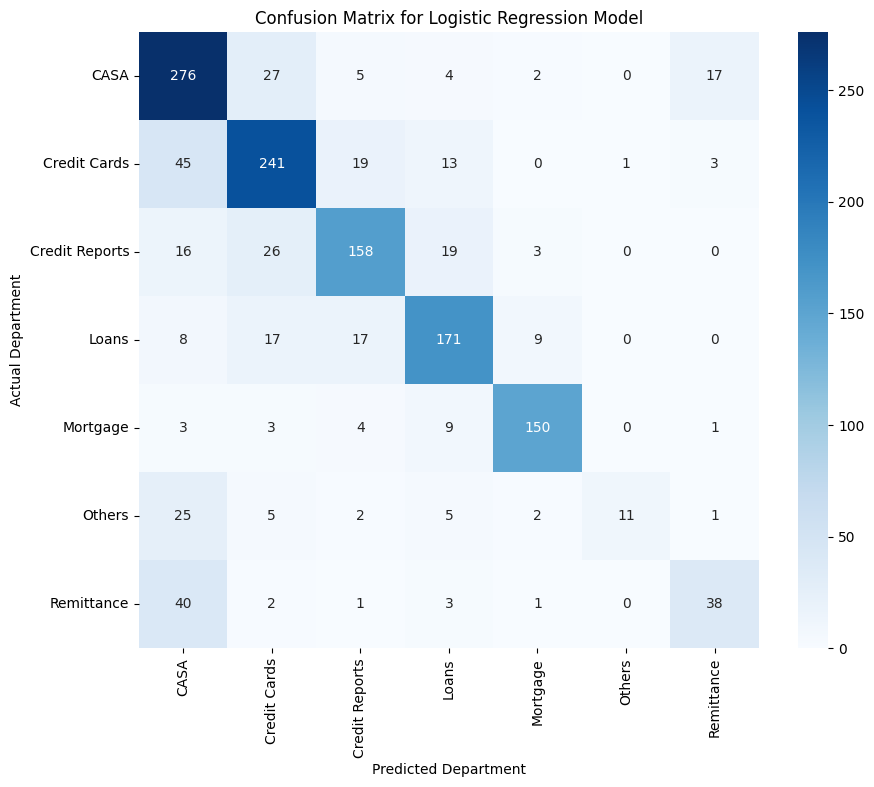

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, logreg_preds)

# Get the class names from the label_encoder
class_names = label_encoder.classes_

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Department')
plt.ylabel('Actual Department')
plt.show()

## Step - 6: Transformer-based modeling & Sentiment Analysis

In [34]:
# Install vaderSentiment if not already installed
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply the function to the 'preprocessed_description' column
complaints_df["sentiment_scores"] = complaints_df["preprocessed_description"].apply(get_sentiment_scores)

# Extract individual sentiment scores into separate columns
complaints_df["neg"] = complaints_df["sentiment_scores"].apply(lambda x: x["neg"])
complaints_df["neu"] = complaints_df["sentiment_scores"].apply(lambda x: x["neu"])
complaints_df["pos"] = complaints_df["sentiment_scores"].apply(lambda x: x["pos"])
complaints_df["compound"] = complaints_df["sentiment_scores"].apply(lambda x: x["compound"])

# Display the first few rows with the new sentiment columns
print(complaints_df[["preprocessed_description", "neg", "neu", "pos", "compound"]].head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.1 MB/s eta 0:00:00
                            preprocessed_description    neg    neu    pos  \
0  xxxxxx opened safe balance account online usin...  0.159  0.764  0.076   
1  item bank abc credit report belong must remove...  0.101  0.665  0.234   
2  xxxxxx found account frozen apparent reason we...  0.000  1.000  0.000   
3  ive credit card year bank abc xxxxxxxx paid ba...  0.179  0.722  0.099   
4  issue way bank abc account linking bill pay pa...  0.094  0.737  0.169   

   compound  
0   -0.8771  
1    0.4588  
2    0.0000  
3   -0.9213  
4    0.9364  


In [35]:
# Calculate the average sentiment scores for each department
sentiment_by_department = complaints_df.groupby('department')[['neg', 'neu', 'pos', 'compound']].mean().reset_index()

# Display the results
print("Average Sentiment Scores by Department:")
display(sentiment_by_department.round(3))

Average Sentiment Scores by Department:


,department,neg,neu,pos,compound
0,CASA,0.116,0.789,0.094,-0.180
1,Credit Cards,0.116,0.733,0.152,0.115
2,Credit Reports,0.126,0.713,0.161,0.139
3,Loans,0.142,0.728,0.129,-0.015
4,Mortgage,0.099,0.786,0.114,0.114
5,Others,0.109,0.776,0.116,0.031
6,Remittance,0.117,0.791,0.092,-0.208


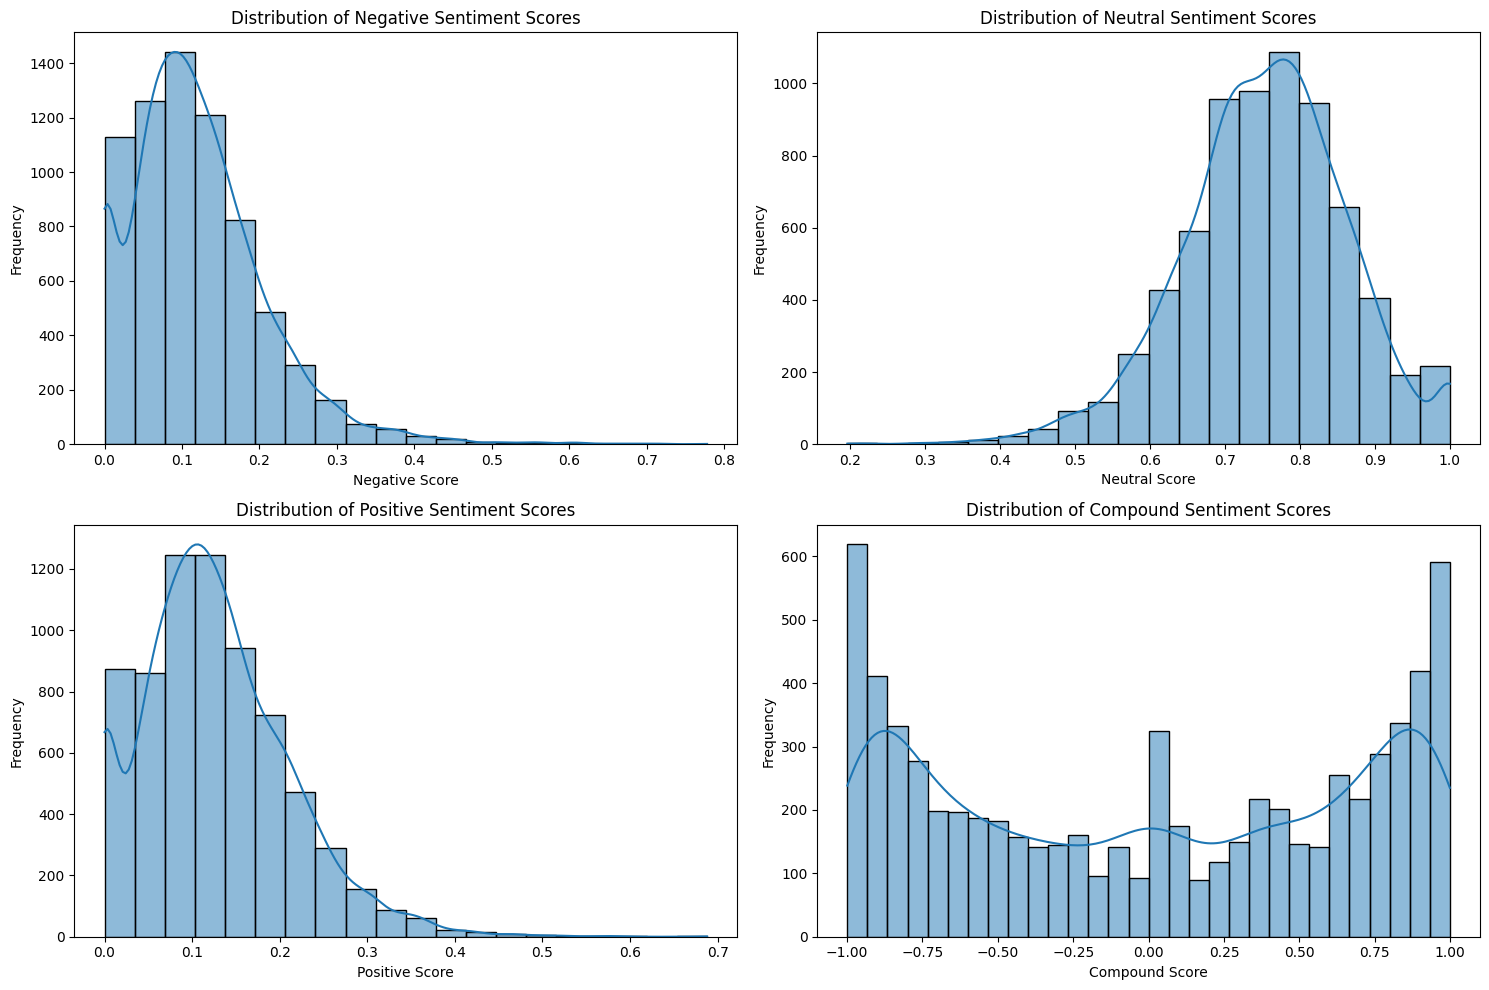

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Distribution of Negative Scores
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st plot
sns.histplot(complaints_df['neg'], bins=20, kde=True)
plt.title('Distribution of Negative Sentiment Scores')
plt.xlabel('Negative Score')
plt.ylabel('Frequency')

# Distribution of Neutral Scores
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd plot
sns.histplot(complaints_df['neu'], bins=20, kde=True)
plt.title('Distribution of Neutral Sentiment Scores')
plt.xlabel('Neutral Score')
plt.ylabel('Frequency')

# Distribution of Positive Scores
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd plot
sns.histplot(complaints_df['pos'], bins=20, kde=True)
plt.title('Distribution of Positive Sentiment Scores')
plt.xlabel('Positive Score')
plt.ylabel('Frequency')

# Distribution of Compound Scores
plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th plot
sns.histplot(complaints_df['compound'], bins=30, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observations from Analysis

**Key Observations:**

- **Overall Sentiment**: Most departments show a slightly negative or neutral average compound sentiment, which is expected for customer complaints. 'CASA' and 'Remittance' have the lowest (most negative) average compound scores.

- **Most Negative**: 'Remittance' has the most negative average compound score (-0.208), followed closely by 'CASA' (-0.180), indicating that complaints related to these departments tend to be more negative overall.

- **Most Positive/Least Negative**: 'Credit Reports' and 'Credit Cards' have the highest (most positive) average compound scores (0.139 and 0.115 respectively), suggesting relatively less negative or more mixed sentiments in their complaints compared to others.

- **Neutrality**: All departments have a high average neutral score, indicating that a significant portion of the complaint text is factual or descriptive without strong emotional language.

- **Negative Proportion**: 'Loans' shows the highest average negative proportion (0.142), suggesting a higher frequency of negative words in complaints directed at this department.

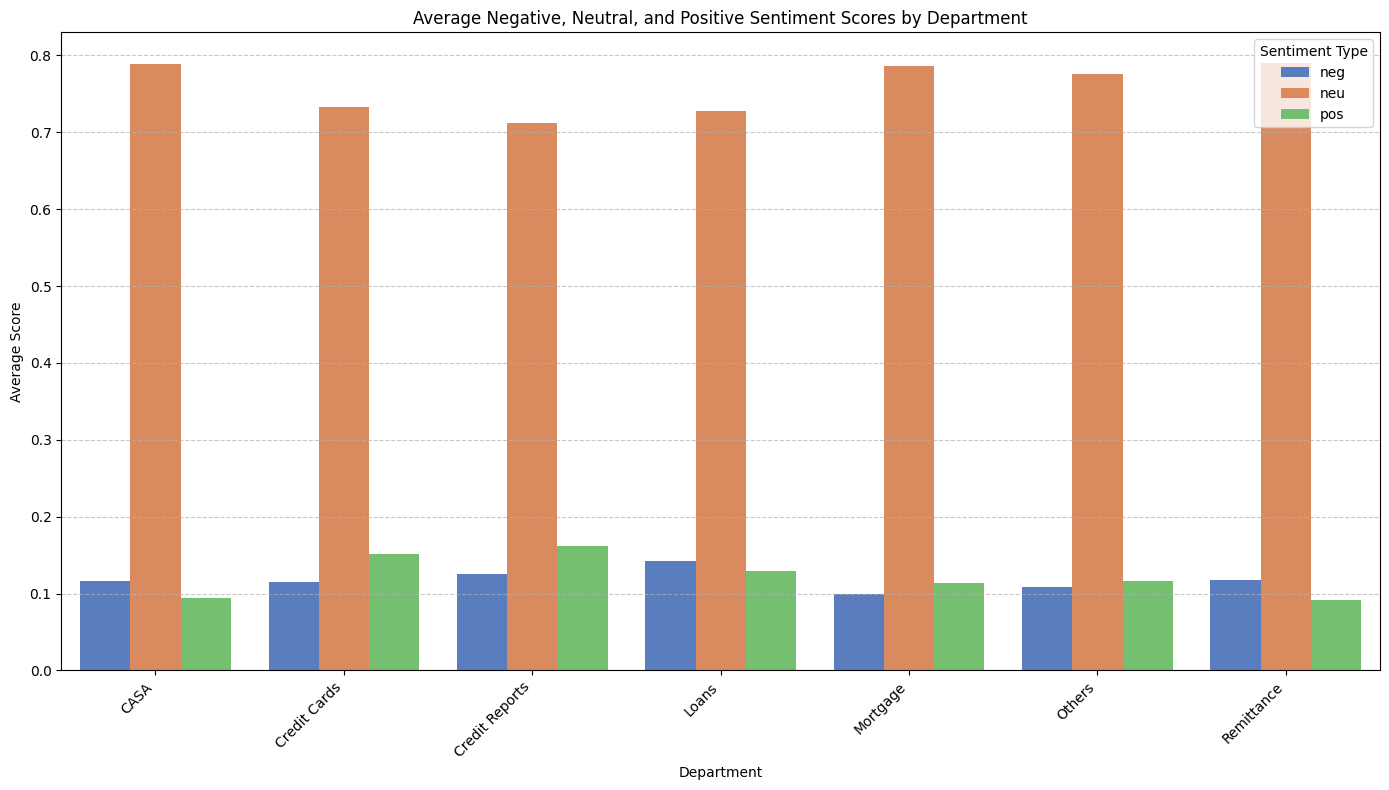

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting neg, neu, pos scores
sentiment_melted = sentiment_by_department.melt(
    id_vars=['department'],
    value_vars=['neg', 'neu', 'pos'],
    var_name='sentiment_type',
    value_name='average_score'
)

plt.figure(figsize=(14, 8))
sns.barplot(x='department', y='average_score', hue='sentiment_type', data=sentiment_melted, palette='muted')
plt.title('Average Negative, Neutral, and Positive Sentiment Scores by Department')
plt.xlabel('Department')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get IDF scores for each feature
# IDF scores indicate how unique or informative a word is across the corpus
idf_scores = tfidf_vectorizer.idf_

# Create a DataFrame to hold feature names and their IDF scores
tfidf_keyword_df = pd.DataFrame({
    'keyword': feature_names,
    'idf_score': idf_scores
})

# Sort by IDF score to find the most distinctive keywords
top_keywords_idf = tfidf_keyword_df.sort_values(by='idf_score', ascending=False).head(20)

print("Top 20 Keywords by IDF Score (most distinctive words):")
display(top_keywords_idf)

Top 20 Keywords by IDF Score (most distinctive words):


,keyword,idf_score
1,aba,8.938981
4970,xxxxrash,8.938981
585,british,8.938981
3300,ppp,8.938981
3022,ols,8.938981
3047,opting,8.938981
616,bww,8.938981
4493,toaster,8.938981
4951,xp,8.938981
678,caterer,8.938981


In [40]:
# To see words that are not necessarily rare but have a high overall presence and importance,
# we can look at the sum of TF-IDF scores across all documents for each feature.

# Convert X_train_tfidf back to a DataFrame for easier manipulation
tfidf_df = pd.DataFrame(X_train_tfidf, columns=feature_names)

print("\nTop 20 Keywords by Sum of TF-IDF Scores (most frequent and important):")

# Calculate the sum of TF-IDF scores for each keyword across all training documents
sum_tfidf_scores = tfidf_df.sum().sort_values(ascending=False).head(20)
display(sum_tfidf_scores.to_frame(name='total_tfidf_score'))


Top 20 Keywords by Sum of TF-IDF Scores (most frequent and important):


,total_tfidf_score
xxxx,936.728063
account,378.836440
bank,360.197535
credit,279.402904
abc,263.404807
card,214.862000
xxxxxxxx,213.777096
payment,176.817631
report,155.866809
money,144.216409


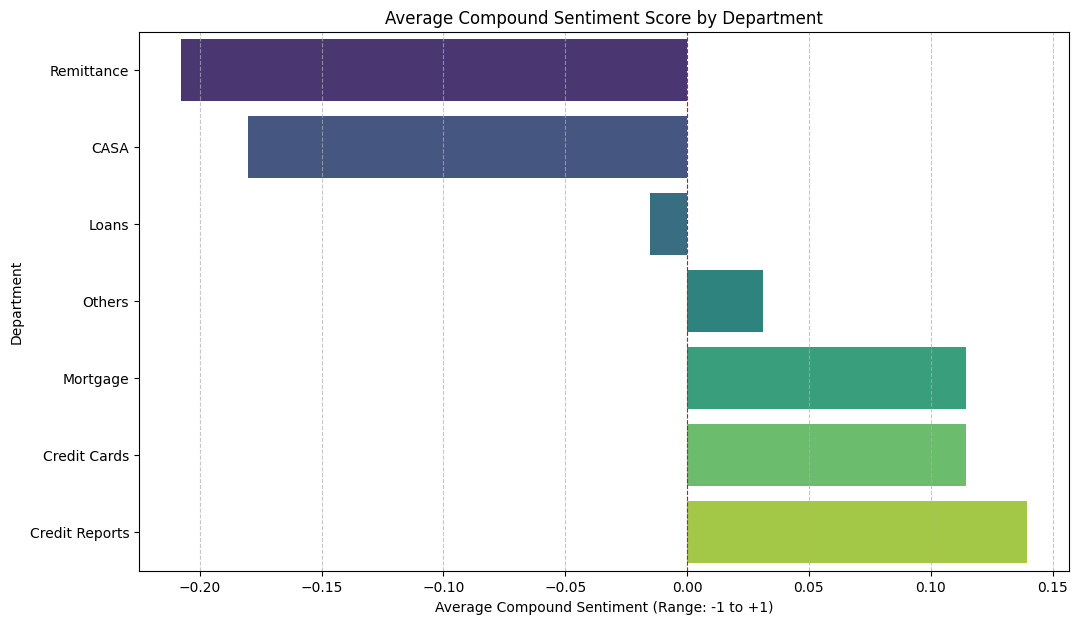

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort departments by compound score for better visualization
sentiment_by_department_sorted = sentiment_by_department.sort_values(by='compound', ascending=True)

plt.figure(figsize=(12, 7))
sns.barplot(x='compound', y='department', hue='department', data=sentiment_by_department_sorted, palette='viridis', legend=False)
plt.title('Average Compound Sentiment Score by Department')
plt.xlabel('Average Compound Sentiment (Range: -1 to +1)')
plt.ylabel('Department')
plt.axvline(0, color='red', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

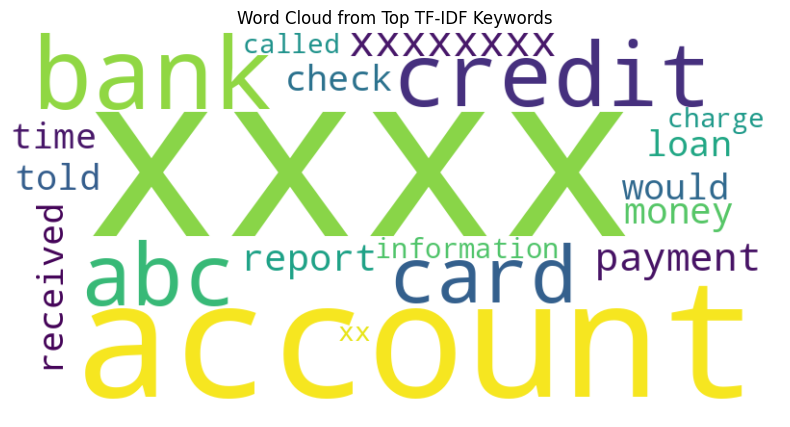

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the Series of sum_tfidf_scores to a dictionary
word_freq = sum_tfidf_scores.to_dict()

# Generate a word cloud image
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False # Set to False to avoid duplicate word pairings
).generate_from_frequencies(word_freq)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Top TF-IDF Keywords')
plt.show()

## Step - 7: Business Insights, Strategy Recommendations

### Actionable Insights for the Bank from Sentiment Analysis and Classification

1. **Automated Complaint Triage & Prioritization**

    - **Classification Model (Logistic Regression)**: Automate routing of complaints to the correct department (e.g., Credit Cards, Mortgage) with ~74.5% accuracy, significantly speeding up resolution.
    - **Sentiment Scores (Compound Score)**: Flag complaints with highly negative sentiment (especially from 'Remittance' and 'CASA' departments) for immediate attention, regardless of their department. This proactive approach helps prevent escalation and improve customer satisfaction for critical cases.

2. **Early Warning System for Product/Service Issues**

    - **Sentiment Trends**: Continuously monitor average sentiment scores by department and product. A sudden drop or sustained negativity can signal emerging problems (e.g., a bug in online banking, a new policy causing widespread dissatisfaction).
    - **Combined with Keywords**: Use highly negative sentiment in conjunction with top TF-IDF keywords (e.g., 'fraud' + negative sentiment) to pinpoint specific issues that require urgent investigation and resolution.

3. **Targeted Process Improvement & Training**

    - **Departmental Focus**: Direct resources and conduct deeper root cause analysis in departments with consistently low average compound sentiment, such as 'Remittance' and 'CASA'. This could involve process re-engineering or specialized training for staff.
    - **Complaint-Specific Insights**: Analyze the text of highly negative complaints to understand the exact pain points, which can guide improvements in specific products, services, or customer interaction processes.

4. **Enhanced Customer Retention & Proactive Engagement**

    - **Identify At-Risk Customers**: Use a history of highly negative sentiment in complaints to identify customers who are dissatisfied and at risk of leaving the bank. Proactive personalized outreach can improve retention.
    - **Tailored Communication**: Adapt the tone and urgency of customer service responses (automated or human) based on the sentiment score of the complaint.

5. **Data-Driven Product Development**

    - **Feedback Loop**: Integrate sentiment and keyword insights into product development cycles. If many negative complaints are about a specific feature or a lack of functionality, this directly informs future product enhancements.
    
By systematically integrating these insights, the bank can move towards a more proactive and customer-centric approach to grievance management, leading to improved operational efficiency, higher customer satisfaction, and a stronger brand reputation.